# SciKit Learn for Machine Learning

* contains functions for predictive modeling
* simple and efficient tools for data mining and data analysis
* built on Numpy, SciPy and Matplotlib
* open source

### *What is ML?*
* machine learning is a method of data analysis that automates analytical model building
* using algorithms that iteratively learn from data, machine learning allows computers to find insights without being explicitly programmed where to look

### *What is ML used for?*
* fraud detection
* web search results
* real-time ads on web pages
* prediction of equipment failure
* new pricing models
* network intrusion detection
* recommendation engines
* customer segmentation
* text sentiment analysis
* predicting customer churn
* pattern and image recognition
* email spam filtering
* financial modeling

## Linear Regression

```
response = intercept + constant × explanatory
```
* prediction for continuous variables
* predictive modeling technique **to predict numeric response variable** based on explanatory variable(s)
* model is designed to fit a line that minimizes distances between all observed and corresponding predicted values
    * most commonly used: Least Squares Minimization, minimze the sum of squared residuals
    * residual is the difference between observation (y-value) and fitted line

### Initiate Model
`regression_model = linear_model.LinearRegression()`
* instantiating an estimator object
    * any object, that learns from data
    * e.g. classification, regression, clustering  *(those are algorithms)*
* creating an instance of particular algorithm that can be trained on data
* initialisation parameters can be passed on in this step, otherwise default

### Aim
build a model capable of predicting a value of the dependent variable by feeding new data (that the model has not been trained on)
* first: create model and train/fit on provided data (training data)
* quality of the trained model is evaluated by comparing predicted values with actual values by running the model on the independent values from the original dataset
* To avoid overfitting, the dataset is split in training and test sets
    * overfitting happens, when the model if fitted too well, so it becomes less generalizable

### Linear Regression Evaluation Metrics
loss functions:
* **Mean Absolute Error (MAE)**: average error
* **Mean Squared Error (MSE)**: punishes larger errors, more sensitive to outliers and deviations from true values
* **Root Mean Squared Error (RMSE)**: expressed in same units as target variable 'y', interpretable measure of the average magnitude of errors in the original units of the target variable


## General Machine Learning Process

### Step 0: Preprocessing Data
1. check for missing values
    * data imputation: replace missing values with substitued values (e.g. mean by a category, general mean value, etc.)
    * drop variable
    * check with heatmap

`DataFrame[DataFrame.isna().any(axis=1)]`

* to filter rows from the DataFrame that contain at least one missing value in any column
* `DataFrame.isna()`:
    * generate DataFrame, where each element is `True`if it is missing in the original DataFrame, `False`otherwise
    * creates a boolean mask with locations of missing values
* `.any(axis=1)`:`
    * returns `True` for rows wehre at least one element is `True`
    * checks along axis 1 i.e. the rows
* it is basically just boolean indexing to filter

2. convert categorical features into dummies

`pd.get_dummies()`

* generates a seperate set of dummies/booleans for each category
* argument `drop_first=`: drops first set of dummies
    * dropped category can be interpreted as reference category


### Step 1: Split Data into Training and Test Set i.e. Cross-Validation

`X_train, X_test, y_train, y_test = train_test_split(covariates, dependent variable, train_size = 0.7, random_state = 101)`

* `train_size=` or `test_size=`: share of observations for the training/test set (commonly used share is 0.7/0.3)
* `random_state=`: random seed for reproducability
* to avoid overfitting when evaluating the model
* to evaluate predictive models by separating orginal sample into training set and test set
    * training set: data the model will be trained on
    * test set: data the trained model will predict, to evaluate model

### Step 2: Train the Data
*model* = `linear_model.LinearRegression()`  
*model*`.fit(X =  , y=)`

* `X= `: explanatory/independent variables
* `y= `: outcome/dependent variable
* Examine the Model: access attributes of the class
    * `.intercept_`
    * `.coef_`


### Step 3: Predict Data

*model*`.predict(X_train)`  
*model*`.predict(X_test)`  

* predict test and training data
* use trained model to generate 'predictions' for already known values
* include all coefficients used for training
* vector of predictions will be for y, which was specified during training

### Step 4: Evaluate the Model

* MSE:
    * `MSE_train = mean_squared_error(y_train_predictions, y_train)`  
    * `MSE_test = mean_squared_error(y_test_predictions, y_test)`  
* RMSE:
    * `RMSE_train = mean_squared_error(y_train_predictions, y_train)**0.5`  
    * `RMSE_test = mean_squared_error(y_test_predictions, y_test)**0.5`
* compare errors between test and training
    * if difference is too significant, threat of overfitting the model




In [1]:
# imports entire linear submodule from sklearn
# accessing stuff from there needs a prefix '.linearmodel.'
from sklearn import linear_model

# imports specific class from the linear submodule
# method can be accessed without prefix
from sklearn.linear_model import LinearRegression


import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sample data set
mtcars = pd.read_csv('https://raw.githubusercontent.com/evdoks/' \
                     'data_science/master/data/mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Linear Regression Model

In [3]:
# Initialization of Training Model: linear regression
regression_model = linear_model.LinearRegression()

In [4]:
# Train the Model
linear_model.LinearRegression().fit(X = pd.DataFrame(mtcars[["wt", "drat", "cyl", "hp"]]), 
                                    y = pd.DataFrame(mtcars["mpg"]))

LinearRegression()

In [5]:
regression_model.fit(X = pd.DataFrame(mtcars[["wt"]]), 
                     y = pd.DataFrame(mtcars["mpg"]))

LinearRegression()

In [6]:
# Examine the Model
print('Intercept:', regression_model.intercept_)
print('Coefficients: ', regression_model.coef_)

Intercept: [37.28512617]
Coefficients:  [[-5.34447157]]


In [7]:
# Make Predictions
predictions = regression_model.predict(X = pd.DataFrame(mtcars[["wt"]]))
print(predictions)

[[23.28261065]
 [21.9197704 ]
 [24.88595212]
 [20.10265006]
 [18.90014396]
 [18.79325453]
 [18.20536265]
 [20.23626185]
 [20.45004071]
 [18.90014396]
 [18.90014396]
 [15.53312687]
 [17.3502472 ]
 [17.08302362]
 [ 9.22665041]
 [ 8.29671236]
 [ 8.71892561]
 [25.52728871]
 [28.65380458]
 [27.47802083]
 [24.11100374]
 [18.47258623]
 [18.92686632]
 [16.76235533]
 [16.73563297]
 [26.94357367]
 [25.847957  ]
 [29.19894068]
 [20.34315128]
 [22.48093991]
 [18.20536265]
 [22.4274952 ]]


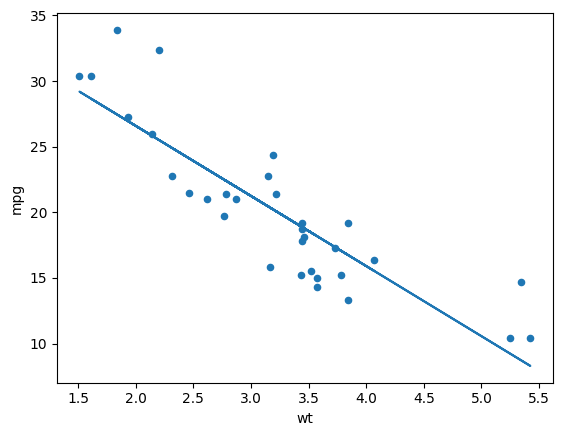

In [8]:
# Scatter Plot
mtcars.plot(kind="scatter", x="wt", y="mpg")

# Fitted regression line
plt.plot(mtcars["wt"], predictions)

In [9]:
# Calculate RMSE
def rmse(pred, y):
    return (np.mean((y-pred)**2))**0.5

rmse(predictions.flatten(), mtcars['mpg'])

2.949162685955028

In [10]:
from sklearn import metrics

metrics.mean_squared_error(predictions, mtcars['mpg'])**0.5

2.949162685955028

## Quadratic Regression Model

In [11]:
poly_model = linear_model.LinearRegression()

In [12]:
# create new pandas DataFrame with squared values
predictors = pd.DataFrame({"wt": mtcars['wt'],
                            "wt_sq": mtcars["wt"]**2})
predictors.head()

,wt,wt_sq
0,2.620,6.864400
1,2.875,8.265625
2,2.320,5.382400
3,3.215,10.336225
4,3.440,11.833600


In [13]:
# train the model on new data frame, but using y from old data frame
poly_model.fit(X=predictors,
               y=pd.DataFrame(mtcars["mpg"]))

LinearRegression()

In [14]:
# examine the model
print("Poly Model Intercept: ", poly_model.intercept_)
print("Poly Model Coefficients: ", poly_model.coef_)

Poly Model Intercept:  [49.93081095]
Poly Model Coefficients:  [[-13.38033708   1.17108689]]


In [15]:
# rmse
poly_pred = poly_model.predict(X = predictors)
print(metrics.mean_squared_error(poly_pred, mtcars["mpg"])**0.5)

2.52330047246108


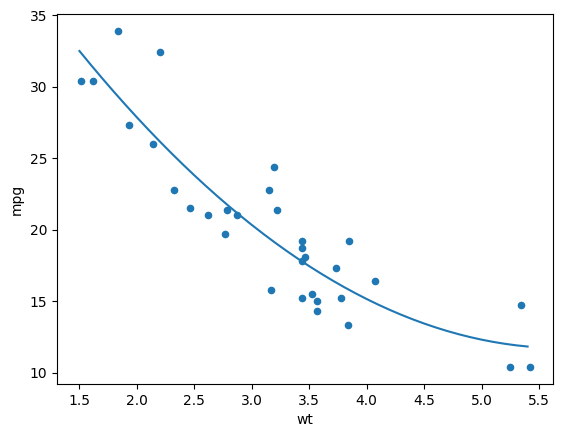

In [16]:
# plot fitted line in scatter plot
poly_range = np.arange(1.5, 5.5, 0.1)
poly_predictors = pd.DataFrame({"wt": poly_range,
                                "wt_sq": poly_range**2})
y_vals = poly_model.predict(X = poly_predictors)

mtcars.plot(kind = "scatter", x="wt", y="mpg")
plt.plot(poly_range, y_vals)

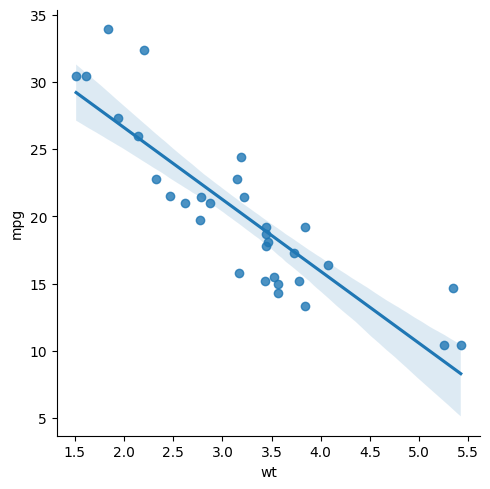

In [17]:
# with confidence 90% interval
sns.lmplot(data = mtcars, x ="wt", y ="mpg", ci=90)

## Cross-Validation

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(mtcars["wt"]),       # X values aka covariates
    pd.DataFrame(mtcars["mpg"]),      # y value aka dependent variable
    train_size = 0.7,                 # share of obs for training set
    random_state = 101                # random seed for reproducabilty
)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 18 to 31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wt      22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [20]:
y_test.count()

mpg    10
dtype: int64

In [21]:
# train linear model on training set
train_model = linear_model.LinearRegression()
train_model.fit(X = pd.DataFrame(X_train),
               y = pd.DataFrame(y_train))

# predict training data
y_train_pred = train_model.predict(X_train)
print("RMSE train: ", metrics.mean_squared_error(y_train_pred, 
                                                 y_train)**0.5)
 
# predict test data
y_test_pred = train_model.predict(X_test)
print("RMSE test: ", metrics.mean_squared_error(y_test_pred, 
                                                y_test)**0.5)

RMSE train:  2.446389454959867
RMSE test:  3.9098115403341906


## Logistic Regression
* classification prediction

### Evaluation Metrics

#### Classification Report
`classification_report(y_test, predictions)`
* **Precision:** ratio of true positive predictions to the total number of positive predictions
    * accuracy of positive predictions
    * defined as TP / (TP + FP
    * high precision indicates that the model has a low false positive rate
* **Recall** i.e. sensitivity: ratio of true positive predictions to the total number of actual positive instances
    * measures the ability of the model to correctly identify positive instances
    * defined as TP / (TP + FN)
    * high recall indicates that the model has a low false negative rate
* **F1-score:** harmonic mean of precision and recall
    * balance between precision and recall and is defined as 2 * (precision * recall) / (precision + recall)
    * ranges from 0 to 1
    * the higher the better performance
* **Support:** number of actual occurrences of each class in the dataset
    * represents the number of true instances of each class

  
#### Confusion Matrix
`confusion_matrix(y_test, predictions, labels=logmodel.classes_)`  
* tabulates number of correct and incorrect predictions of each class

|         | predicted positive | predicted negative |
|---|----|---|
|Actual Positive |  **True Positive (TP)**: <br> correct predictions (1) |**False Negative (FN)**: <br> Type II error, incorrect predictions (0) |
| Actual Negative | **False Positive (FP)**: <br> Type I error, incorrect predictions (1) | **True Negative (TN)**: <br> correct predictions (0) |

#### ROC-Curve (Receiver Operation Characteristics Curve)

* get probability estimates: `logmodel.predict_proba(X_test)[:,1]`
    * for each instance in the dataset, the classification model predicts the probability that it belongs to the positive class (`[:,1]`)
* `fpr, tpr, thr = roc_curve(y_test, y_predict_probabilites)`:
    * `fpr`: False Positive Rate
    * `tpr`: True Positive Rate
    * `thr`: Threshold; array containing the thresholds used to compute the FPR and TPR values
* `roc_auc = auc(fpr, tpr)`: Area Under the Curve
    * representing overall performance of classification model
    * the higher the values, the better (the discrimination between positive and negative)
 





In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# import sample data
train = pd.read_csv('/Users/birteprado/Documents/02 Uni/02 Master/3rd Semester/05 Data Science/01 Lecture/11.1 data/titanic.csv')

<Axes: >

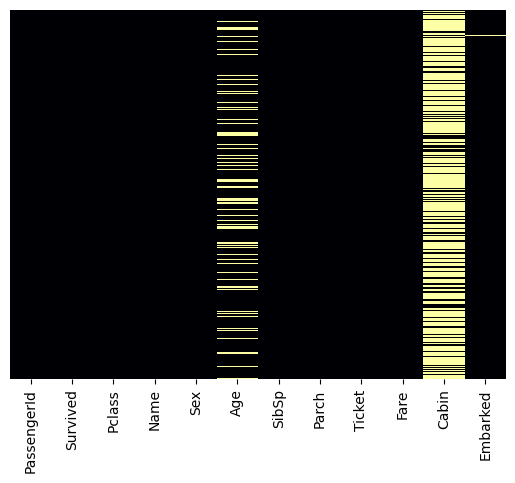

In [24]:
# check for missing data
sns.heatmap(train.isnull(), 
           yticklabels=False,
           cbar=False,
           cmap='inferno')

/var/folders/dp/xjkh2hmd75l5n7n96tm19qqm0000gn/T/ipykernel_2148/1944133092.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/dp/xjkh2hmd75l5n7n96tm19qqm0000gn/T/ipykernel_2148/1944133092.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

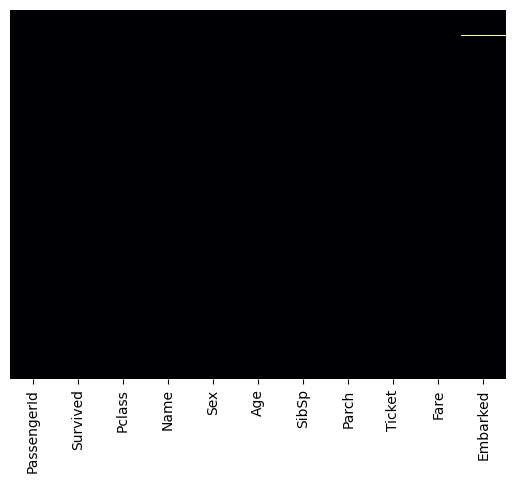

In [25]:
# drop Cabin
train.drop('Cabin', axis=1, inplace=True)

# impute Age data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='inferno')

In [26]:
# check for rows with missing values
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [27]:
# convert categorical features into dummies
sex = pd.get_dummies(train['Sex'])
print(sex)

     female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[891 rows x 2 columns]


In [28]:
male = pd.get_dummies(train['Sex'], drop_first=True)
print(male)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[891 rows x 1 columns]


In [29]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# drop categorical variables from data set
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

# add newly created dummies to the data set instead
train = pd.concat([train, male, embark], axis=1)

In [30]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis =1),     # using all columns as covariates except the survivor one
    train['Survived'],
    test_size = 0.3,
    random_state = 101)


In [31]:
# initialize model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'liblinear')

# train the model
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [32]:
# predict test set
log_pred = logmodel.predict(X_test)

In [33]:
# evaluate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# classification report
print(classification_report(y_test, log_pred))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



[[135  19]
 [ 41  73]]


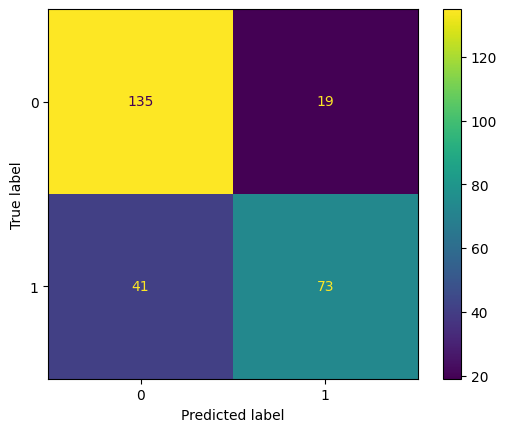

In [34]:
# confusion matrix, just gives out an array
cm = confusion_matrix(y_test, 
                      log_pred, 
                      labels = logmodel.classes_)

# confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                              display_labels= logmodel.classes_)
disp.plot()
print(cm)

In [35]:
# prediction probabilities

y_predict_prob = logmodel.predict_proba(X_test)[:,1]

In [36]:
from sklearn.metrics import roc_curve, auc

# get false positive rate, true positive rate and thresholds
fpr, tpr, thr = roc_curve(y_test, y_predict_prob)

# area under ROC curve
roc_auc = auc(fpr, tpr)

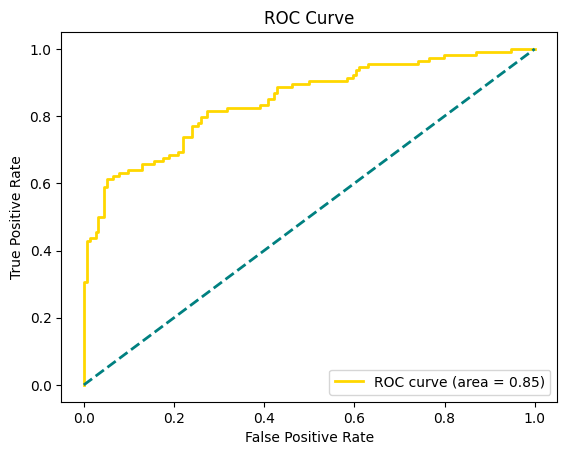

In [37]:
# plot results with MATPLOTLIB
plt.figure()
plt.plot(fpr, tpr, color='gold',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='teal', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()